In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('Loan Prediction Dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

### Preprocessing the data


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Filling the missing values for the numerical terms:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean())
data.Credit_History = data.Credit_History.fillna(data.Credit_History.mean())

In [8]:
# Filling the missing values for the categorical terms:
data.Gender = data.Gender.fillna(data.Gender.mode()[0])
data.Dependents = data.Dependents.fillna(data.Dependents.mode()[0])
data.Married = data.Married.fillna(data.Married.mode()[0])
data.Self_Employed = data.Self_Employed.fillna(data.Self_Employed.mode()[0])

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Exploratory Data Analysis:


C:\Users\svkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

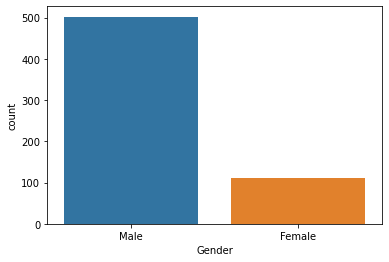

In [10]:
sns.countplot(data['Gender'])

C:\Users\svkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

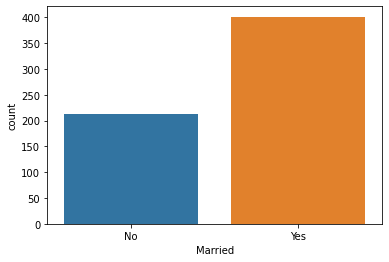

In [11]:
sns.countplot(data['Married'])

C:\Users\svkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

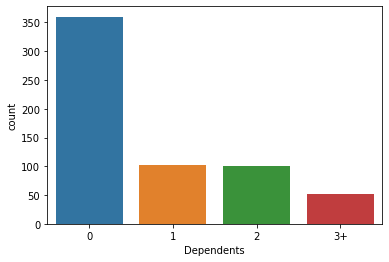

In [12]:
sns.countplot(data['Dependents'])

### EDA For Numerical Features

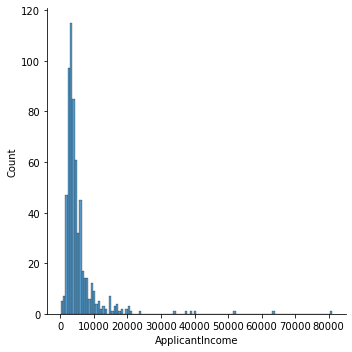

In [13]:
sns.displot(data['ApplicantIncome'])   # we can see that the graph is skewed, so we will have to apply log function to 
# normalize the data

In [14]:
data['ApplicantIncome_log'] = np.log(data.ApplicantIncome)

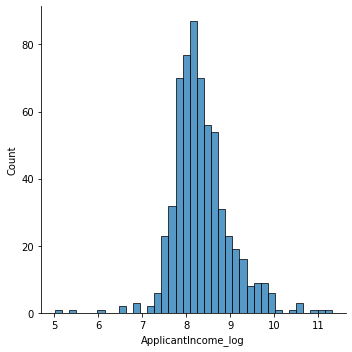

In [15]:
sns.displot(data['ApplicantIncome_log']) 

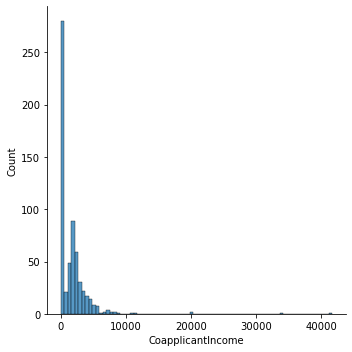

In [16]:
sns.displot(data['CoapplicantIncome']) 

In [17]:
data['CoapplicantIncome_log'] = np.log(data.CoapplicantIncome + 1)

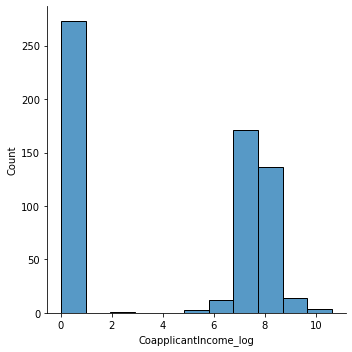

In [18]:
sns.displot(data['CoapplicantIncome_log']) 

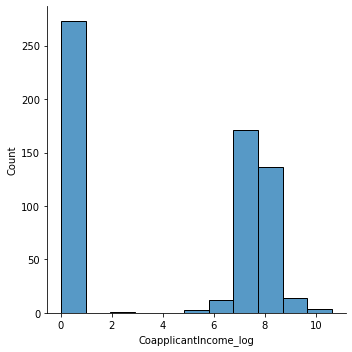

In [19]:
sns.displot(data['CoapplicantIncome_log']) 

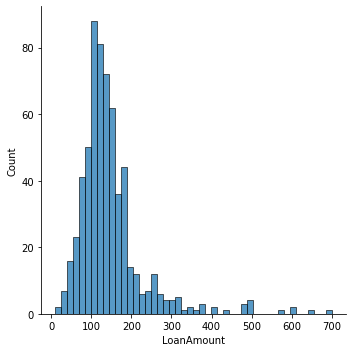

In [20]:
sns.displot(data.LoanAmount) 

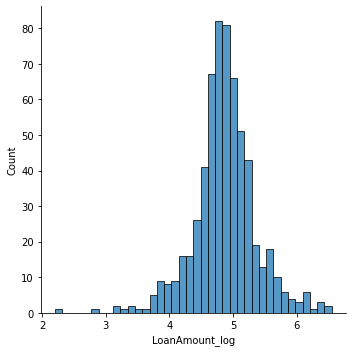

In [21]:
data['LoanAmount_log'] = np.log(data.LoanAmount)
sns.displot(data.LoanAmount_log)

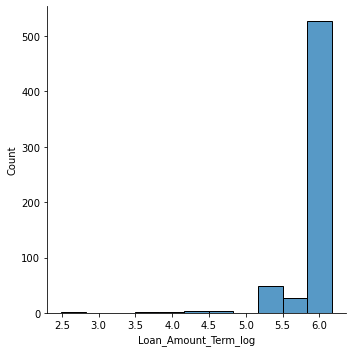

In [22]:
data['Loan_Amount_Term_log'] = np.log(data.Loan_Amount_Term)
sns.displot(data.Loan_Amount_Term_log) 

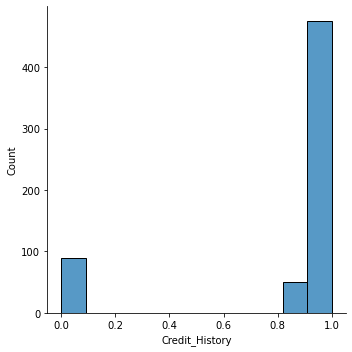

In [23]:
sns.displot(data['Credit_History'])

In [24]:
# Creating a new feature

In [25]:
data['Total_income'] = data.ApplicantIncome + data.CoapplicantIncome

In [26]:
data.Total_income.value_counts()

6000.0     5
3750.0     4
2500.0     4
4583.0     4
4166.0     3
          ..
4566.0     1
11146.0    1
3784.0     1
8312.0     1
2904.0     1
Name: Total_income, Length: 554, dtype: int64

In [27]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,0.000000,4.986426,5.886104,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,7.319202,4.852030,5.886104,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,0.000000,4.189655,5.886104,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,7.765993,4.787492,5.886104,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,0.000000,4.948760,5.886104,6000.0


In [28]:
data.Total_income.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: Total_income, Length: 614, dtype: bool

In [29]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,0.000000,4.986426,5.886104,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,7.319202,4.852030,5.886104,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,0.000000,4.189655,5.886104,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,7.765993,4.787492,5.886104,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,0.000000,4.948760,5.886104,6000.0


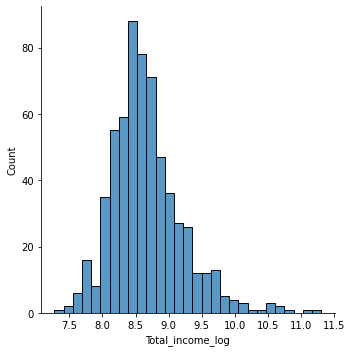

In [30]:
data['Total_income_log'] = np.log(data['Total_income'])
sns.displot(data['Total_income_log'])

In [31]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_income,Total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,0.000000,4.986426,5.886104,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,7.319202,4.852030,5.886104,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,0.000000,4.189655,5.886104,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,7.765993,4.787492,5.886104,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,0.000000,4.948760,5.886104,6000.0,8.699515


<AxesSubplot:>

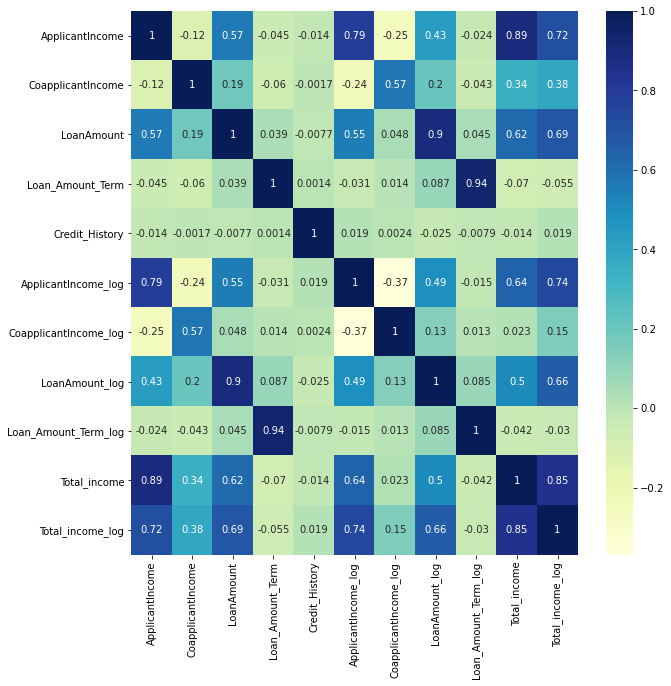

In [32]:
corr = data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu')

In [33]:
dataset = data.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_income','CoapplicantIncome_log'],axis = 1)

In [34]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
LE = LabelEncoder()
for col in cols:
    dataset[col] = LE.fit_transform(dataset[col]) 

In [35]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_income_log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


In [36]:
X = dataset.drop(['Loan_Status'], axis = 1)
Y = dataset['Loan_Status']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

### Model Training

In [38]:
from sklearn.model_selection import cross_val_score
def classification(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
    model.fit(X_train, Y_train)
    print('The accuracy is ', model.score(X_test, Y_test) * 100)
    score = cross_val_score(model, X, Y, cv = 5)
    print('Cross validation is',np.mean(score) * 100)

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classification(model, X, Y)

The accuracy is  77.27272727272727
Cross validation is 80.9462881514061


### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classification(model, X, Y)

The accuracy is  71.42857142857143
Cross validation is 71.17286418765826


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classification(model, X, Y)

The accuracy is  75.97402597402598
Cross validation is 78.50593096094894


### Extra Trees Classifier

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classification(model, X, Y)

The accuracy is  74.67532467532467
Cross validation is 77.03985072637612


### Confusion Matrix for Random Forest

In [43]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [44]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
cm

array([[23, 31],
       [ 4, 96]], dtype=int64)

<AxesSubplot:>

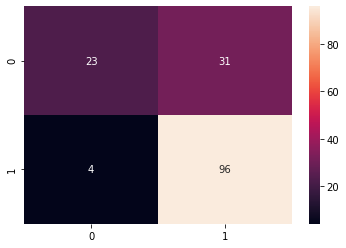

In [45]:
sns.heatmap(cm, annot = True)

### CM For Logistic REgression

In [46]:
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
cm

array([[21, 33],
       [ 2, 98]], dtype=int64)

<AxesSubplot:>

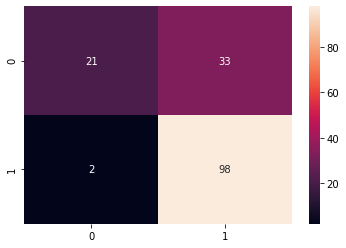

In [47]:
sns.heatmap(cm, annot = True)

In [48]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train, Y_train)

SVC(kernel='linear')

In [49]:
from sklearn.metrics import accuracy_score
X_train_pred = clf.predict(X_train)
train_acc = accuracy_score(X_train_pred, Y_train)

In [50]:
X_test_pred = clf.predict(X_test)
test_acc = accuracy_score(X_test_pred, Y_test)

In [51]:
print('The training model Accuracy is :',train_acc )

The training model Accuracy is : 0.8217391304347826


In [52]:
print('The test model Accuracy is :',test_acc )

The test model Accuracy is : 0.7727272727272727
